In [2]:
import numpy as np
import pandas as pd
from scipy.stats import nbinom

In [3]:
data = pd.read_csv(".\Code+data\Data\intrusionevents.txt", delimiter="\ \ \ ")
data

C:\Users\zd26\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,time,observation
0,1,5
1,2,7
2,3,7
3,4,10
4,5,5
5,6,13
6,7,8
7,8,19
8,9,17
9,10,9


In [6]:
from math import gamma, factorial
import math

from scipy.special import binom 

bestLogLikelihood = -100000
bestBeta = 0

def getLogPMF(a, m, beta, x):
    firstTerm = math.log(      binom(a*beta + x - 1, x)  ) 
    secondTerm =  - x *math.log(1 + a*beta/m )
    thirdTerm = (a*beta) *  ( math.log(  a*beta  /  m ) - math.log(1 + a*beta  /  m)  )
    return firstTerm + secondTerm + thirdTerm

loglikelihood = {}
xs = data.values[:,1].tolist()
nums = data.values.shape[0]
print("There are {} observations".format(nums))
(a_0, m_0) = (25, 14.5)
for beta in np.arange(0.80, 1.00, 0.01):
    phisPriors = [(a_0, m_0)]
    logprob = 0
    for t in range(nums):
        a_here = phisPriors[t][0]
        m_here = phisPriors[t][1]
        k = a_here * beta
        n = xs[t]
        p = 1 / (1 +  a_here * beta /m_here )
        logprob += getLogPMF(a_here, m_here, beta, n) 
        a_next = a_here * beta + n
        m_next = m_here *   (a_here * beta + n)  /   (a_here * beta + m_here)   
        phisPriors.append( (a_next, m_next))
    loglikelihood[round(beta, 3)] = logprob
    
    if logprob > bestLogLikelihood:
        bestLogLikelihood = max(bestLogLikelihood, logprob)
        bestBeta = beta
    
    
print(loglikelihood)
print(bestLogLikelihood)
print(bestBeta)


There are 52 observations
{0.8: -146.47977782596985, 0.81: -146.4523271721212, 0.82: -146.43955567372606, 0.83: -146.4429219497521, 0.84: -146.46405177986534, 0.85: -146.50474191841408, 0.86: -146.56696212586755, 0.87: -146.65285817710134, 0.88: -146.76476208895104, 0.89: -146.9052212179342, 0.9: -147.07706520081774, 0.91: -147.28353766739997, 0.92: -147.52852438286382, 0.93: -147.81690304233925, 0.94: -148.1550100700576, 0.95: -148.55115377882447, 0.96: -149.0159997555013, 0.97: -149.56254244370552, 0.98: -150.20532972778764, 0.99: -150.9587221870833}
-146.43955567372606
0.8200000000000001


There are 52 observations


<function matplotlib.pyplot.show(*args, **kw)>

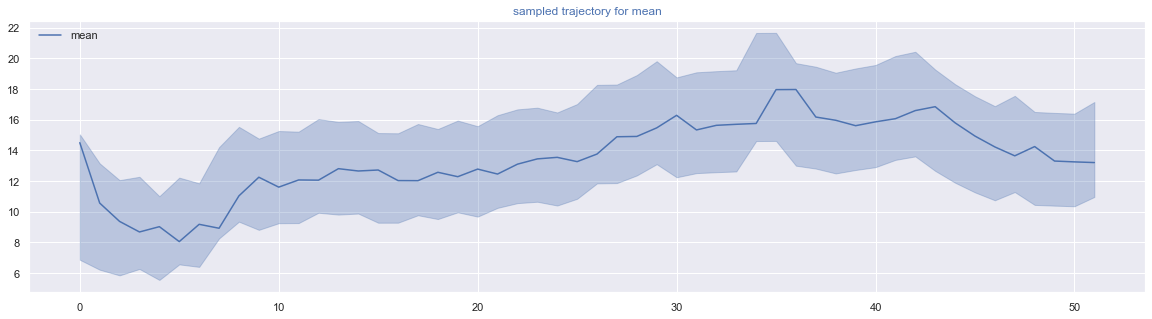

In [15]:
from math import gamma, factorial
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma

from scipy.special import binom 

beta = bestBeta
xs = data.values[:,1].tolist()
nums = data.values.shape[0]
print("There are {} observations".format(nums))
(a_0, m_0) = (25, 14.5)
phisPriors = [(a_0, m_0)]
phisPred = []
upper = []
lower = []
for t in range(nums):
    a_here = phisPriors[t][0]
    m_here = phisPriors[t][1]
    k = a_here * beta
    n = xs[t]
    p = 1 / (1 +  a_here * beta /m_here ) 
    a_next = a_here * beta + n
    m_next = m_here *   (a_here * beta + n)  /   (a_here * beta + m_here)   
    phisPriors.append( (a_next, m_next))
    phisPred.append( (a_here * beta, a_here * beta / m_here) )
    down, up  = gamma.interval(0.95, a= phisPriors[-1][0], scale = phisPriors[-1][1] / phisPriors[-1][0])
    upper.append(up)
    lower.append(down)

    
sns.set()
fig, ax = plt.subplots( figsize=(20,5))
ax.set_title("sampled trajectory for mean".format("seaborn"), color = 'C0')
ax.plot([j for j in range(nums)], [ j[0]/j[1] for j in phisPriors],  label = "mean")
ax.fill_between([j for j in range(nums)], lower, upper, color='b', alpha=.3) 
ax.legend(loc='upper left', frameon=False)
plt.show

    
    

In [140]:
from scipy.stats import betaprime

stats = (beta** 8) *    (phisPred[51][0] * phisPred[43][1])   /  (phisPred[51][1] * phisPred[43][0])
a = (beta** 8) * phisPred[43][0]
b = phisPred[43][0]
pvalue = betaprime.cdf(stats, a, b)
pvalue

0.21435352604525507

In [10]:
len(phisPriors)

53

In [11]:
len(phisPred)

52

In [12]:
phisPred

[(20.5, 1.4137931034482758),
 (20.91, 1.9793103448275862),
 (22.886200000000002, 2.4430344827586206),
 (24.506684000000003, 2.823288275862069),
 (28.295480880000007, 3.1350963862068966),
 (27.30229432160001, 3.3907790366896555),
 (33.04788134371201, 3.600438810085517),
 (33.65926270184385, 3.7723598242701253),
 (43.18059541551196, 3.913335055901503),
 (49.34808824071981, 4.028934745839233),
 (47.84543235739025, 4.1237264915881715),
 (50.71325453306001, 4.201455723102301),
 (51.42486871710921, 4.265193692943887),
 (55.288392348029554, 4.317458828213988),
 (55.17648172538424, 4.36031623913547),
 (55.904715014815075, 4.3954593160910855),
 (53.22186631214837, 4.424276639194691),
 (53.48193037596166, 4.447906844139648),
 (56.15518290828857, 4.46728361219451),
 (55.067249984796625, 4.483172561999498),
 (57.455144987533245, 4.4962015008395895),
 (56.13321888977727, 4.506885230688464),
 (59.149239489617365, 4.51564588916454),
 (60.80237638148625, 4.5228296291149235),
 (61.33794863281874, 4.528